## Preliminaries
Just like last time, you'll need to run the following box in order to set up the support code and libraries we use. If you're on Google colab, it'll download our library. 

In [43]:
import numpy as np
import scipy

import os
if not os.path.exists('rj_controls.py'):
    !wget https://gist.githubusercontent.com/kylestach/478a46de93cf2ccc83a9aabfa3869cb8/raw/0cbc69675dfa284f0bff05bd68e00203391badc7/rj_controls.py

import rj_controls as rjc

# Chapter 2: Modeling Systems


The goal of a control system designer is to develop a rule (controller) that selects an input to make the output what we want. PID is a commonly used controller because you can often tune a PID loop without any particular understanding of how the underlying system works. While this may be convenient, it's got some real shortcomings. As you've seen, tuning controllers is a very hand-wavy process: you pretty much have to play around with constants until you get something that works nicely. PID also doesn't generalize nicely to more complex systems: for example, if you have multiple control inputs or a system with strict limits.

To overcome these limitations, we will need to develop a strong theory of dynamic modeling, or mathematically predicting how these systems evolve over time.

## General Mathematical Model

Mathematically, a dynamical system is just a series of _differential equations_ (equations that tell you the derivatives of your variables) which describe how an output signal changes with regards to an input.

As mentioned in the previous chapter, the output of a dynamic system can be described as a function of its *state variables* and its input.  To state this mathematically, 
$$ y(t) = f(x, u, t) $$

It is convenient to split the above equation into two equations.  

$$
\frac{d}{dt} x = \dot{x} = f(x, u) \tag{1}
$$
$$
y = g(x, u) \tag{2}
$$

Equation 1 is known as the "state equation" while equation 2 is known as the "output equation."

> Remember: _inputs_ are your control inputs (like motor voltages) and _outputs_ mean your sensor measurements.


## Linear, Time-Invariant Systems

We will pay special attention to systems that are called __Linear Time-invariant (LTI)__ as they have special useful properties.

First, let's look at what is meant by *linear* in the context of plain old functions.

**Definition**. A transformation $f(x)$ is *linear* if the following relationships hold:
 - $f(x + y) = f(x) + f(y)$
 - $f(a \cdot x) = a \cdot f(x)$ for a scalar $a$

Note that this definition can apply to values of $f$ that take in and return either scalars or vectors. If $f: \mathbb{R} \to \mathbb{R}$ (takes in a scalar and outputs a scalar) it is just some line passing through the origin: $f(x) = ax$. In the general case, it is a matrix transformation:
$$f(x) = Ax$$

Now let's take a look at what it means in the context of systems. If we ignore state, a system is just a mapping from $u(t)$ (our control inputs over time) to $y(t)$ (our sensor measurements over time). We'll write this as $u(t) \to y(t)$.

> Note: Technically this transformation is turning a _function_ (of time) into _another function_. If you're thinking that this formalism is a bit complicated or hard to reason about, you're right! We'll use state variables to simplify the way we think about linear systems in a bit - this is just the formal definition.

For a system to be linear, it just needs to obey the same rules: if we have $u(t) \to y(t)$ then we also get
 - $a \cdot u(t) \to a \cdot y(t)
 - $u_1(t) + u_2(t) \to y_1(t) + y_2(t)$

The word *Time-invariant* refers to the fact that the relationship between state, input, and output is the same no matter when you start the system. In other words, the following are equivalent:
$$u(t) \to y(t)$$
$$u(t + T) \to y(t + T)$$

These useful properties can be exploited to simplify the math. 

> Note: These might seem like some pretty restrictive assumptions. Conveniently, lots of real-world systems are well approximated by linear systems.

Below are some examples of linear systems. Look at the plots, and write down everything you see in common between them.

======================== System 1 ========================
Unforced


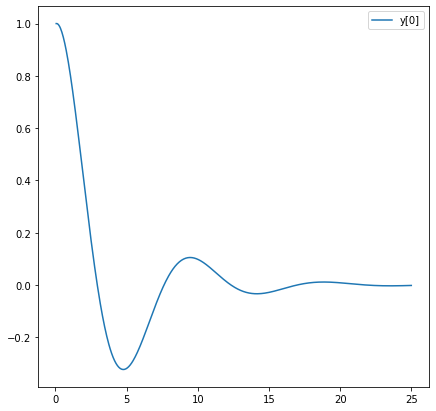

Forced, u(t)=1


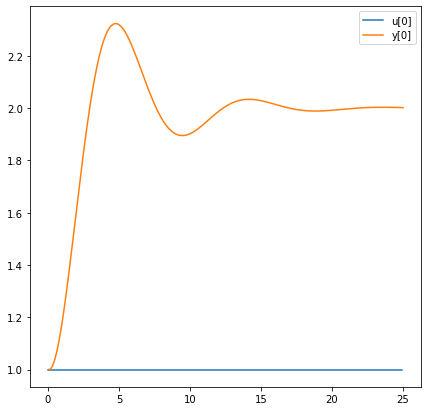

Forced, u(t)=sin(2*t)


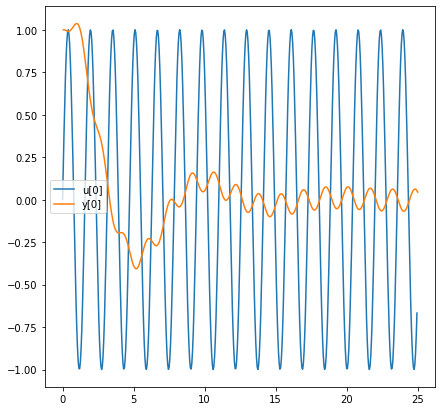

======================== System 2 ========================
Unforced


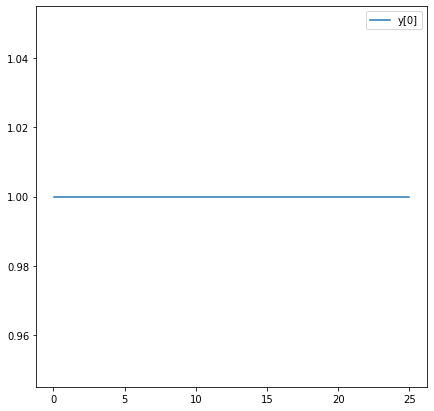

Forced, u(t)=1


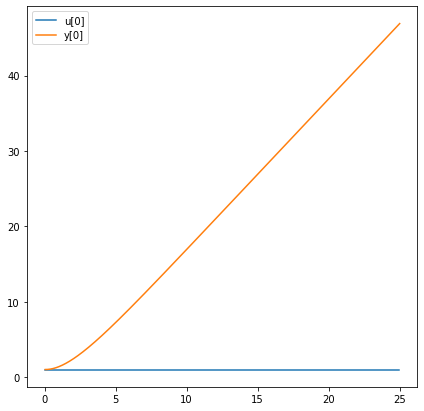

Forced, u(t)=sin(2*t)


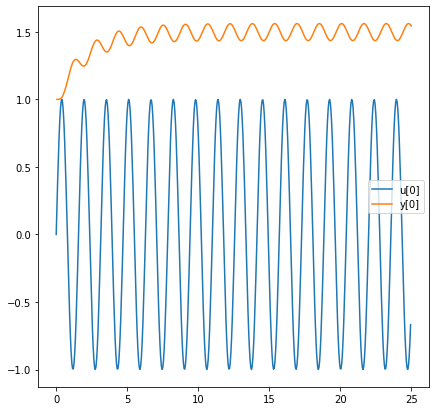

======================== System 3 ========================
Unforced


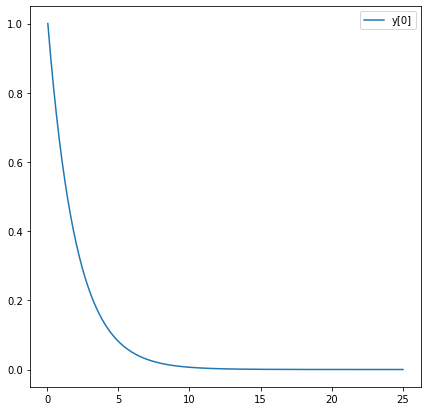

Forced, u(t)=1


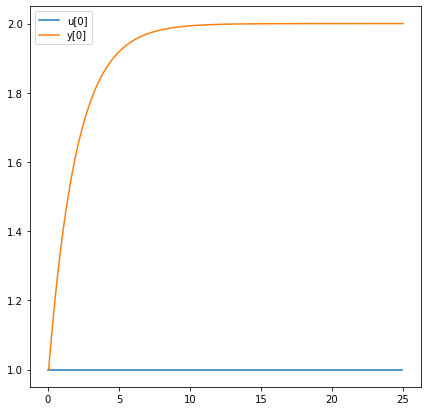

Forced, u(t)=sin(2*t)


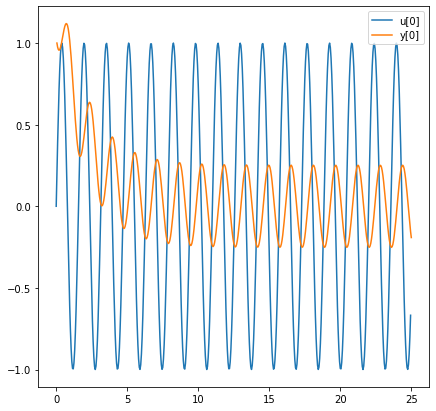

======================== System 4 ========================
Unforced


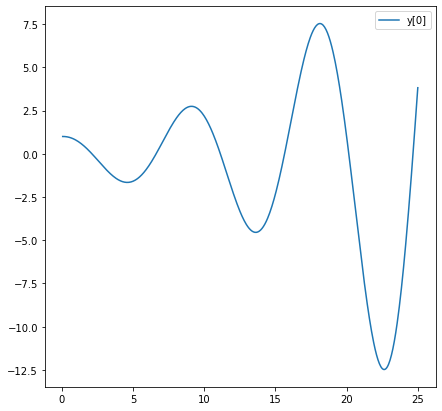

Forced, u(t)=1


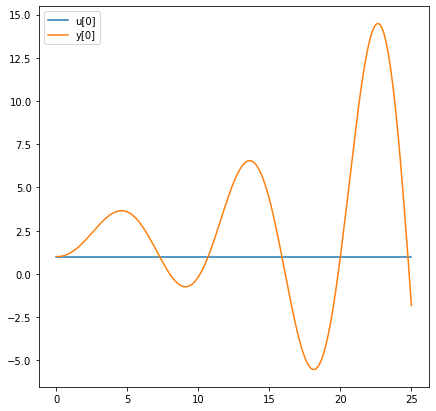

Forced, u(t)=sin(2*t)


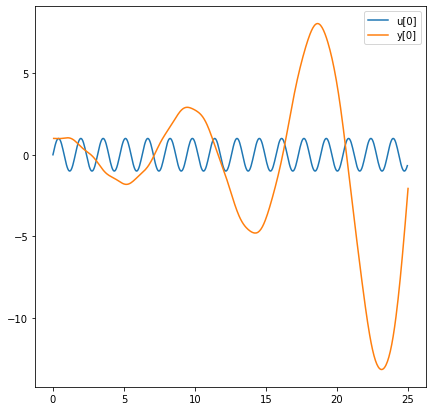

In [41]:
import importlib
importlib.reload(rjc)

T = 500
dt = 0.05

print("======================== System 1 ========================")
x0 = np.array([1, 0])
dynamics = lambda x, u, t: np.array([x[1], u[0] - 0.5 * x[0] - 0.5 * x[1]])

print("Unforced")
rjc.simulate_system(x0, dynamics, dt, T, discrete=False,
                    output_fn=lambda x, t: x[0],
                    hide_states=[0, 1])

print("Forced, u(t)=1")
rjc.simulate_system(x0, dynamics, dt, T, discrete=False,
                    control_fn=lambda x, t: 1.0,
                    output_fn=lambda x, t: x[0],
                    hide_states=[0, 1])
print("Forced, u(t)=sin(2*t)")
rjc.simulate_system(x0, dynamics, dt, T, discrete=False,
                    control_fn=lambda x, t: np.sin(4 * t),
                    output_fn=lambda x, t: x[0],
                    hide_states=[0, 1])

print("======================== System 2 ========================")
x0 = np.array([1, 0])
dynamics = lambda x, u, t: np.array([x[1], u[0] - 0.5 * x[1]])

print("Unforced")
rjc.simulate_system(x0, dynamics, dt, T, discrete=False,
                    output_fn=lambda x, t: x[0],
                    hide_states=[0, 1])

print("Forced, u(t)=1")
rjc.simulate_system(x0, dynamics, dt, T, discrete=False,
                    control_fn=lambda x, t: 1.0,
                    output_fn=lambda x, t: x[0],
                    hide_states=[0, 1])

print("Forced, u(t)=sin(2*t)")
rjc.simulate_system(x0, dynamics, dt, T, discrete=False,
                    control_fn=lambda x, t: np.sin(4 * t),
                    output_fn=lambda x, t: x[0],
                    hide_states=[0, 1])

print("======================== System 3 ========================")
x0 = np.array([1])
dynamics = lambda x, u, t: np.array([-0.5 * x[0] + u[0]])

print("Unforced")
rjc.simulate_system(x0, dynamics, dt, T, discrete=False,
                    output_fn=lambda x, t: x[0],
                    hide_states=[0])

print("Forced, u(t)=1")
rjc.simulate_system(x0, dynamics, dt, T, discrete=False,
                    control_fn=lambda x, t: 1.0,
                    output_fn=lambda x, t: x[0],
                    hide_states=[0])

print("Forced, u(t)=sin(2*t)")
rjc.simulate_system(x0, dynamics, dt, T, discrete=False,
                    control_fn=lambda x, t: np.sin(4 * t),
                    output_fn=lambda x, t: x[0],
                    hide_states=[0])

print("======================== System 4 ========================")
x0 = np.array([1, 0])
dynamics = lambda x, u, t: np.array([x[1], u[0] - 0.5 * x[0] + 0.2 * x[1]])

print("Unforced")
rjc.simulate_system(x0, dynamics, dt, T, discrete=False,
                    output_fn=lambda x, t: x[0],
                    hide_states=[0, 1])

print("Forced, u(t)=1")
rjc.simulate_system(x0, dynamics, dt, T, discrete=False,
                    control_fn=lambda x, t: 1.0,
                    output_fn=lambda x, t: x[0],
                    hide_states=[0, 1])

print("Forced, u(t)=sin(2*t)")
rjc.simulate_system(x0, dynamics, dt, T, discrete=False,
                    control_fn=lambda x, t: np.sin(4 * t),
                    output_fn=lambda x, t: x[0],
                    hide_states=[0, 1])

What did you notice?

Hint: what's the relationship between the first plot for each system (unforced), and the third plot (cycling input)?

> Note: we _strongly_ recommend that you have some experience with differential equations before you look at this section. If the term "Laplace Transform" is unfamiliar to you, you might want to take a break and come back to this. You don't need to know how to _take_ Laplace transforms, but you should be familiar with the terminology.
> Transfer functions aren't strictly necessary for the remainder of this training, but it is good background knowledge to have.

### (Optional) Transfer Function

For an LTI system, the output is a linear combination of input and state variables.  If you select state variables according to the common convention (derivatives of the desired system output) then you will reach the following equation
$$a_0 y + a_1 y' + a_2 y'' + a_3 y''' + ... a_n y^{(n)} = b_0 u + b_1 u' + b_2 u'' + b_3 u''' + ... b_m u^{(m)}$$

where the order of the system $n > m$.

If you've taken a differential equations course, you might have seen the _Laplace Transform_. 

It is useful to take the Laplace transform of both sides, resulting in two polynomials in $s$. This can be rearranged to form a new equation,

$$
H(s) = \frac{Y(s)}{U(s)} = \frac{b_0 + b_1 s + b_2 s^2 + b_3 s^3 ... + b_m s^m}{a_0 + a_1 s + a_2 s^2 + a_3 s^3 ... + a_n s^n} $$

Note how we have turned a complex differential equation into a rational function through the use of the Laplace Transform.  This rational function represents the relationship between the Laplace Transform of the input $U(s)$ and output $Y(s)$.  This is called the __Transfer Function.__  We care a lot about the denominator of the transfer function, which we refer to as the _characteristic equation._


The Transfer Function is the core of classical control techniques (developed in the 1920s and popularized in industry in the 1950s).  It is indeed useful as it allows the complex time-domain behaviors to be perfectly captured in a simple rational function.  Unfortunately it becomes limited and a bit difficult to deal with as the order gets large. Advances in mathematics have brought about a new theory which simplifies the manipulation of differential equations by introducing linear algebra.

### State Space form

In LTI systems, the state derivative and output are both possible to represent as linear combinations of the current state variables and the input.  In your differential equations course, you have likely studied how to convert a high-order linear differential equation (such as a system dynamics equation in input-output form) into a matrix of differential equations.  We can also write such a matrix directly from a set of dynamics equations without even converting them to input-output form.  This process is shown below. 

For some system with a rotary position $\theta$ and input $u$, suppose the dynamic equations can be stated as 
$$
\ddot{\theta} = -\alpha \dot{\theta} + \beta u
$$
Seeing as there is at most a second derivative (the $\ddot{\theta}$) we can tell that this is a second order system.  We can select the two state variables to be $\theta$ and $\dot{\theta}$, then add another equation representing as such.  From this, we can concatenate the two state variables to create a unified state vector,

$$
\bf{x} = 
\begin{bmatrix}
\theta \\
\dot{\theta}
\end{bmatrix}
$$
This state vector has a derivative as well,

$$
\bf{\dot{x}} = 
\begin{bmatrix}
\dot{\theta} \\
\ddot{\theta}
\end{bmatrix}
$$

We can write the above stated pair of equations as a system of equations represented in a matrix

$$
\bf{\dot{x}} = 
\begin{bmatrix}
\dot{\theta} \\
\ddot{\theta}
\end{bmatrix}
=
\begin{bmatrix}
0 & 1 \\
0 & -\alpha
\end{bmatrix}
\begin{bmatrix}
\theta \\
\dot{\theta}
\end{bmatrix}
+
\begin{bmatrix}
0 \\
-\beta
\end{bmatrix}
u
$$

If the output $y$ (the thing we cared about in the system) was the angular position $\theta$, we can write another equation in the same form. 

$$
y = 
\begin{bmatrix}
1 & 0
\end{bmatrix}
\begin{bmatrix}
\theta \\
\dot{\theta}
\end{bmatrix}
$$

The above two equations can be written in a general form, below

$$
\dot{x} = Ax + Bu \\
y = Cx + Du
$$

This is called the __State Space Representation__ of the system and, in parallel to the transfer function, forms the basis of modern control system theory. 
 
# Common Systems
 - DC Motor
 -  Differential Drivetrain
 -  RoboCup Drivetrain
 
# Analysing Systems
 - Stability
 - Eigenvalues and eigenvectors
 
## Time-Domain Analysis

# Continuous and Discrete Time

In the real world, things are always happening, and thus time is a continuous variable.  Functions of time can thus take inputs and have defined outputs for any value of the time variable $t$.  Time-varying systems which can take in any value of $t$ are said to be *continuous-time*.

Computers, on the other hand, fail at this.  If your code is running at a loop, it will take a nonzero amount of time for each iteration of the loop to run.  Thus the computer can only represent values, perform mathematical operations, or produce new data at finite intervals, defined by the computer's loop speed.  Systems that operate on signal values in finite intervals are called *discrete-time*.  These use a different time variable, an integer (usually $k$) which denotes which "step" the system is on. 


 
# Discretization
 - Zero-order hold
 - Euler discretization
 - Analytical discretization (`scipy.cont2discrete`)
 
Controllers are usually implemented as code running on computers which are connected to actuators.  These actuators then apply force to objects in the real world in order to move them.  The controller, a discrete time system, must be able to accurately understand the real world dynamics, a continuous time system, in order to select the best control output to send to the actuator.  This requires us to be able to convert the continuous time dynamic equations into their equivalent discrete-time ones, so we can input these into our code.